Solar Radiation Measurement Data EDA

In [48]:
# Load the data 
import pandas as pd

togo_data = pd.read_csv('../../data/data/togo-dapaong_qc.csv')

benin_data = pd.read_csv('../../data/data/benin-malanville.csv')

sierra_leone_data = pd.read_csv('../../data/data/sierraleone-bumbuna.csv')

In [49]:
# initial data exploration

print(togo_data.head())
print(benin_data.head())
print(sierra_leone_data.head())

print(togo_data.info())
print(benin_data.info())
print(sierra_leone_data.info())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
          Timestamp 

In [50]:
# Missing values check
print(togo_data.isnull().sum())
print(benin_data.isnull().sum())
print(sierra_leone_data.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp             0
GHI                   0
DNI           

Data Cleaning


In [51]:
# Convert 'Timestamp' to datetime
for df in [togo_data, benin_data, sierra_leone_data]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [52]:
for df in [togo_data, benin_data, sierra_leone_data]:
    df.fillna(method='ffill', inplace=True) 

C:\Users\USER\AppData\Local\Temp\ipykernel_9272\4135838859.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [53]:
# Dropping the empty 'Comments' column
for df in [togo_data, benin_data, sierra_leone_data]:
    df.drop(columns=['Comments'], inplace=True)


In [54]:
import numpy as np

def handle_negative_values(df):
    for col in ['GHI', 'DNI', 'DHI']:
        df[col] = df[col].clip(lower=0)  
    return df

togo_data = handle_negative_values(togo_data)
benin_data = handle_negative_values(benin_data)
sierra_leone_data = handle_negative_values(sierra_leone_data)



Summary Statistics

In [55]:
# Summary statistics
togo_summary = togo_data.describe()
benin_summary = benin_data.describe()
sierra_leone_summary = sierra_leone_data.describe()

print(togo_summary)
print(benin_summary)
print(sierra_leone_summary)


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     231.718786     151.258469   
min              2021-10-25 00:01:00       0.000000       0.000000   
25%              2022-01-24 06:00:45       0.000000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     321.691953     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

Data Quality Check

In [56]:
import numpy as np
from scipy.stats import zscore


togo_z_scores = togo_data.select_dtypes(include=[np.number]).apply(zscore)
benin_z_scores = benin_data.select_dtypes(include=[np.number]).apply(zscore)
sierra_leone_z_scores = sierra_leone_data.select_dtypes(include=[np.number]).apply(zscore)


threshold = 3  
togo_outliers = (togo_z_scores.abs() > threshold).any(axis=1)
benin_outliers = (benin_z_scores.abs() > threshold).any(axis=1)
sierra_leone_outliers = (sierra_leone_z_scores.abs() > threshold).any(axis=1)


togo_cleaned = togo_data[~togo_outliers]
benin_cleaned = benin_data[~benin_outliers]
sierra_leone_cleaned = sierra_leone_data[~sierra_leone_outliers]

print(f"Togo cleaned data shape: {togo_cleaned.shape}")
print(f"Benin cleaned data shape: {benin_cleaned.shape}")
print(f"Sierra Leone cleaned data shape: {sierra_leone_cleaned.shape}")


Togo cleaned data shape: (505416, 18)
Benin cleaned data shape: (507608, 18)
Sierra Leone cleaned data shape: (494388, 18)


Time Series analysis

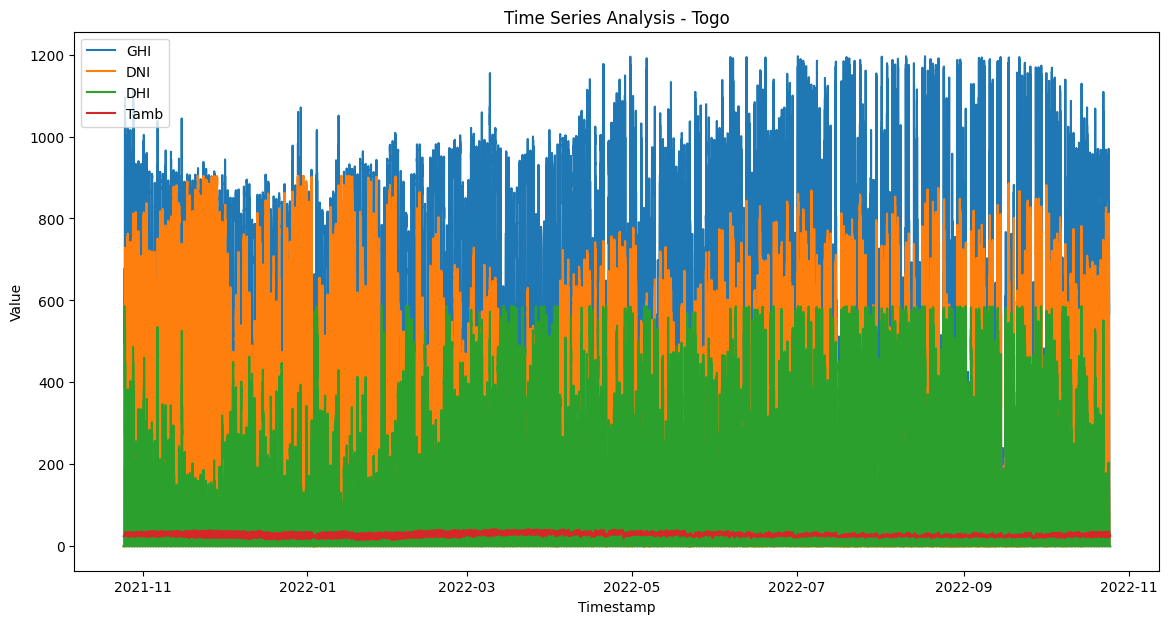

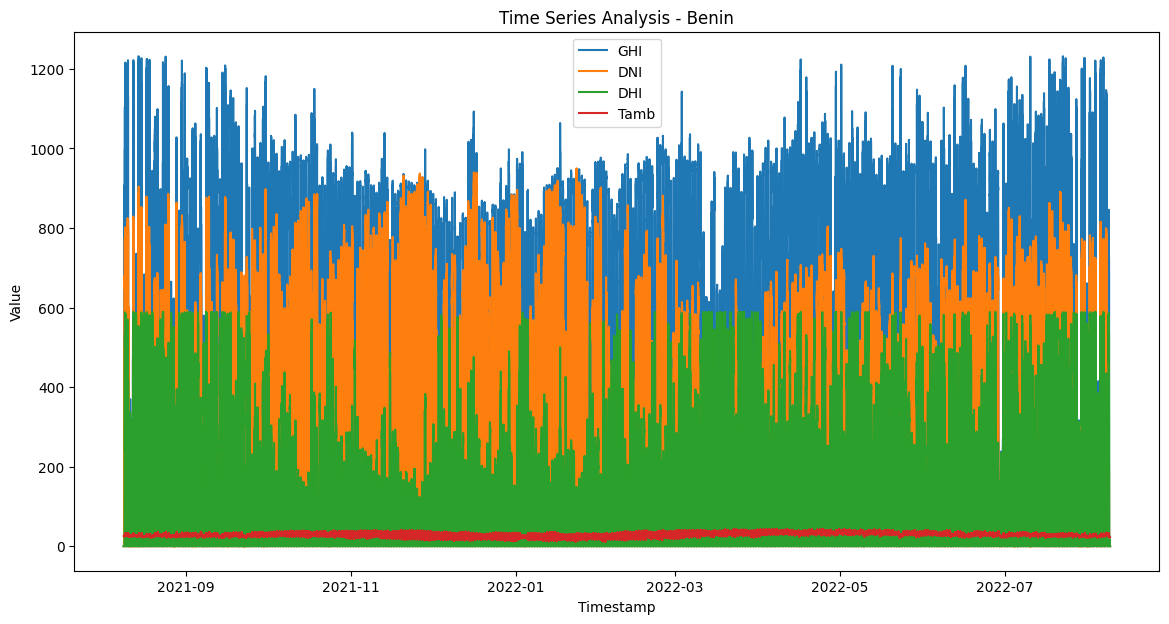

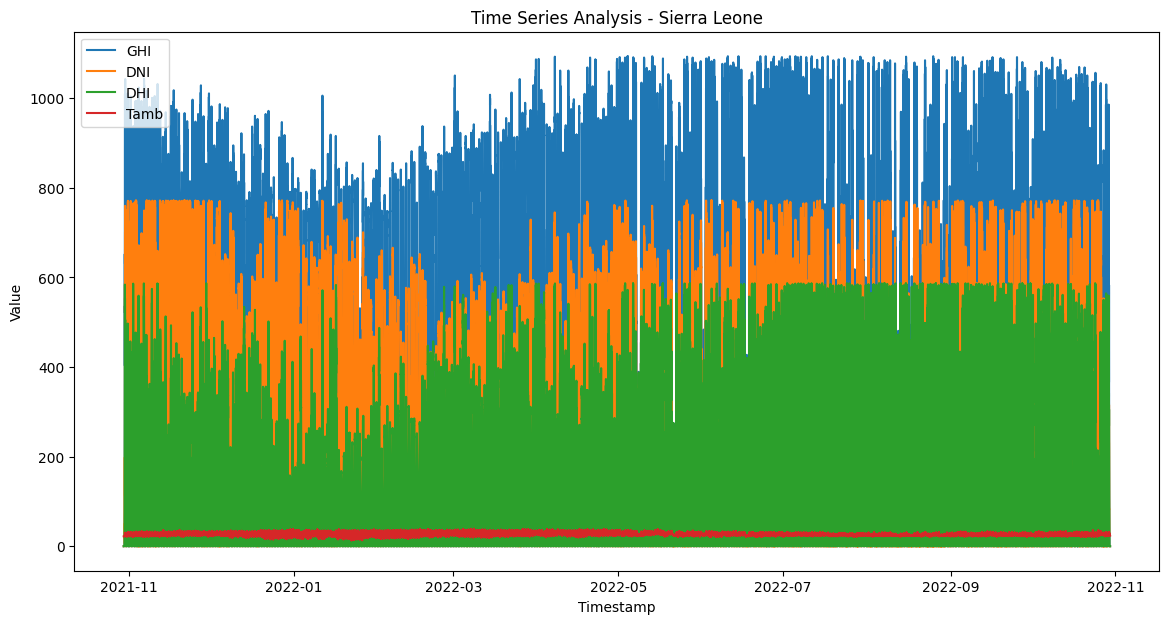

In [57]:
import matplotlib.pyplot as plt

# Plot time series for GHI, DNI, DHI, and Tamb for Togo, Benin, and Sierra Leone
def plot_time_series(df, location):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Timestamp'], df['GHI'], label='GHI')
    plt.plot(df['Timestamp'], df['DNI'], label='DNI')
    plt.plot(df['Timestamp'], df['DHI'], label='DHI')
    plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
    plt.title(f'Time Series Analysis - {location}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_time_series(togo_cleaned, 'Togo')
plot_time_series(benin_cleaned, 'Benin')
plot_time_series(sierra_leone_cleaned, 'Sierra Leone')

